# Predator–prey dynamics: Practicals

> This section contains practicals based on the [Predator–prey dynamics chapter](predator-prey.ipynb).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

```{note} Model conventions used here
- Prey (victim) density: $V(t)$
- Predator density: $P(t)$
- Unless stated, parameters are in arbitrary units and time is in arbitrary units.
```

## Utility: shared helpers

We will reuse these functions across problems.

In [2]:
def integrate(rhs, y0, t_end=50, args=(), n=2000):
    t_eval = np.linspace(0, t_end, n)
    sol = solve_ivp(lambda t,y: rhs(t,y,*args), (0, t_end), y0, t_eval=t_eval,
                    rtol=1e-9, atol=1e-12)
    return sol.t, sol.y


## Problem 3‑1 — LV predator–prey with fisheries

> (3-1) The Lotka–Volterra predator–prey model

The Lotka–Volterra predator–prey model with the effects of fisheries is given by

$$
\begin{aligned}
\frac{dV}{dt} &= (r-f)V - \alpha V P,\\
\frac{dP}{dt} &= \beta V P - qP - fP.
\end{aligned}
$$

Plot the output of the model as time plots and in the phase plane using parameters
$f=1$, $q=1.5$, $r=1.5$, $\alpha=1$, $\beta=1$.

Also plot the isoclines and construct a phase portrait.
Where do the orbits go to? Where is the equilibrium of the model?
Is it stable? Is it unstable?

Now change the parameter $f$, which describes the fishing effort.
What happens to the equilibrium? Relate this to D’Ancona’s observation.

**Related chapter sections:**  
- *Lotka–Volterra predator–prey model*
- *LV with fishing (D’Ancona)*


In [3]:
def lv_fish_rhs(t, y, r, a, b, q, f):
    V, P = y
    return [(r-f)*V - a*V*P, b*V*P - (q+f)*P]

def fish_equilibrium(r,a,b,q,f):
    return (q+f)/b, (r-f)/a

def plot_phase_portrait(rhs, params, Vlim, Plim, initials, t_end=80):
    plt.figure()
    for y0 in initials:
        t,(V,P) = integrate(rhs, list(y0), t_end=t_end, args=params, n=1500)
        plt.plot(V,P, linewidth=0.9)
        plt.plot([y0[0]],[y0[1]], marker="o", markersize=2, linestyle="none")
    plt.xlim(*Vlim); plt.ylim(*Plim)
    plt.xlabel("V"); plt.ylabel("P")


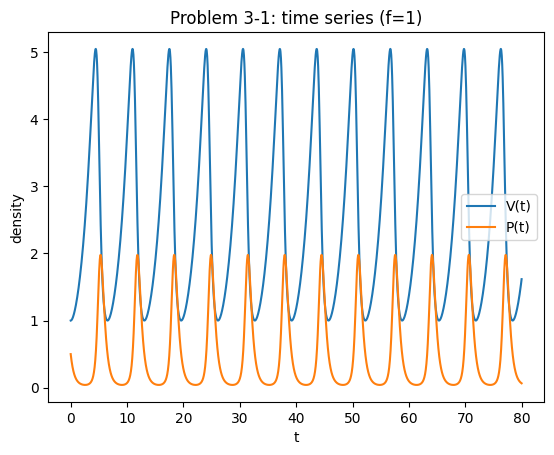

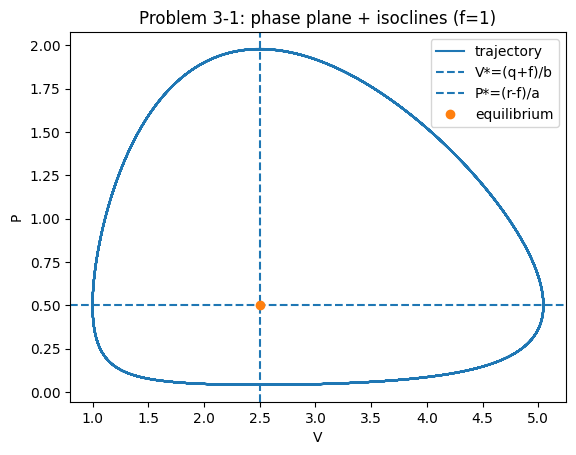

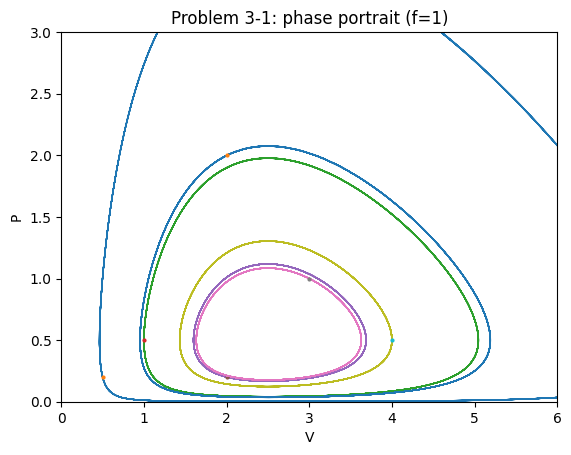

In [4]:
# Given parameters
f=1.0; q=1.5; r=1.5; a=1.0; b=1.0
params = (r,a,b,q,f)

# Time series from one initial condition
y0 = (1.0, 0.5)
t,(V,P) = integrate(lv_fish_rhs, list(y0), t_end=80, args=params)

Vstar,Pstar = fish_equilibrium(r,a,b,q,f)

plt.figure()
plt.plot(t,V,label="V(t)")
plt.plot(t,P,label="P(t)")
plt.xlabel("t"); plt.ylabel("density")
plt.title("Problem 3-1: time series (f=1)")
plt.legend(); plt.show()

plt.figure()
plt.plot(V,P,label="trajectory")
plt.axvline(Vstar, linestyle="--", label="V*=(q+f)/b")
plt.axhline(Pstar, linestyle="--", label="P*=(r-f)/a")
plt.plot([Vstar],[Pstar], marker="o", linestyle="none", label="equilibrium")
plt.xlabel("V"); plt.ylabel("P")
plt.title("Problem 3-1: phase plane + isoclines (f=1)")
plt.legend(); plt.show()

# Phase portrait
initials = [(0.5,0.2),(1,0.5),(2,0.2),(3,1),(4,0.5),(2,2)]
plot_phase_portrait(lv_fish_rhs, params, Vlim=(0,6), Plim=(0,3), initials=initials, t_end=80)
plt.title("Problem 3-1: phase portrait (f=1)")
plt.show()


### Solution notes (3‑1)

- The nullclines intersect at $(V^*,P^*)=((q+f)/b,(r-f)/a)$ (see the chapter section *LV with fishing (D’Ancona)*).
- As long as $r>f$, predators persist; if $f\ge r$ then $P^*\le 0$ and the only biologically relevant outcome is predator extinction.
- With symmetric harvesting of both species, trajectories remain closed orbits (neutral cycles) in this LV‑type setup; the equilibrium is neither attracting nor repelling (borderline).
- Decreasing fishing (smaller $f$) increases $P^*$ and decreases $V^*$, consistent with D’Ancona’s observation.


## Problem 3‑2a — Rosenzweig–MacArthur dynamics (limit cycles)

> (3-2) Investigate the dynamics of the Rosenzweig–MacArthur model.

The Rosenzweig–MacArthur model is given by

$$
\begin{aligned}
\frac{dV}{dt} &= V\, r\,(k - V) - \frac{\alpha V P}{1+\alpha h V},\\
\frac{dP}{dt} &= P\left(\frac{\beta V}{1+\alpha h V} - q\right).
\end{aligned}
$$

Investigate the dynamics over time, and then make a phase portrait for the parameters:
$k=0.5$, $\alpha=1$, $\beta=1$, $h=1.25$, $q=0.1$, $r=1$.

Repeat the exercise for $k=1.25$, $\alpha=1$, $\beta=1$, $h=1.25$, $q=0.1$, $r=1$.
Compare the two time plots and phase portraits. Admire your limit cycle.

**Related chapter section:**  
- *Holling type II response and the Rosenzweig–MacArthur model*


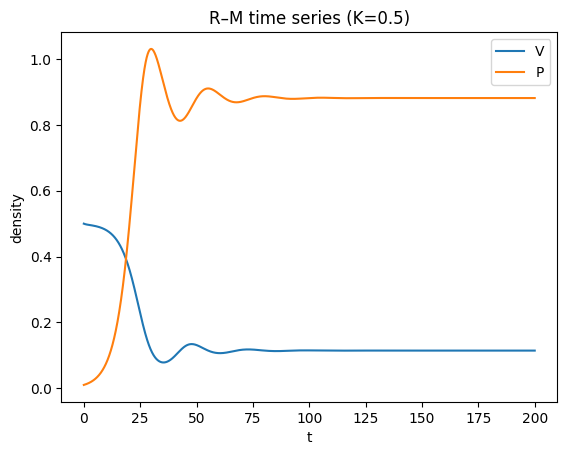

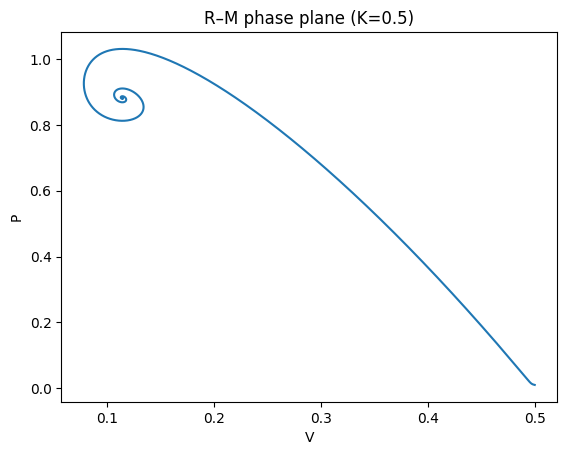

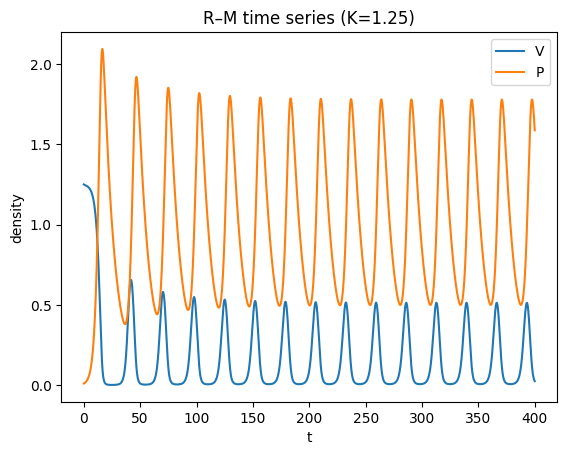

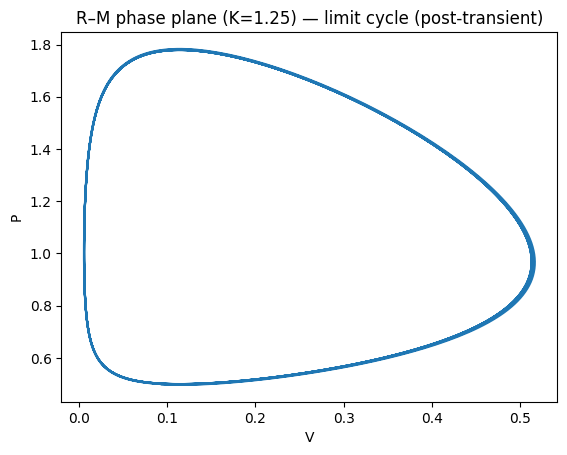

In [5]:
def rm_rhs(t, y, r, K, a, h, b, q):
    V, P = y
    pred = (a*V*P)/(1 + a*h*V)
    return [r*V*(1 - V/K) - pred, b*pred - q*P]

def simulate_rm(K, a=1, b=1, h=1.25, q=0.1, r=1.0, y0=(0.5,0.01), t_end=200):
    t_eval = np.linspace(0, t_end, 6000)
    sol = solve_ivp(lambda t,y: rm_rhs(t,y,r,K,a,h,b,q), (0,t_end), list(y0),
                    t_eval=t_eval, rtol=1e-9, atol=1e-12)
    return sol.t, sol.y

# K=0.5
t,(V,P)=simulate_rm(K=0.5, y0=(0.5,0.01), t_end=200)
plt.figure(); plt.plot(t,V,label="V"); plt.plot(t,P,label="P")
plt.xlabel("t"); plt.ylabel("density"); plt.title("R–M time series (K=0.5)")
plt.legend(); plt.show()

plt.figure(); plt.plot(V,P)
plt.xlabel("V"); plt.ylabel("P"); plt.title("R–M phase plane (K=0.5)")
plt.show()

# K=1.25
t,(V,P)=simulate_rm(K=1.25, y0=(1.25,0.01), t_end=400)
plt.figure(); plt.plot(t,V,label="V"); plt.plot(t,P,label="P")
plt.xlabel("t"); plt.ylabel("density"); plt.title("R–M time series (K=1.25)")
plt.legend(); plt.show()

# show the limit cycle after discarding transients
burn=200
mask = t>=burn
plt.figure(); plt.plot(V[mask],P[mask])
plt.xlabel("V"); plt.ylabel("P"); plt.title("R–M phase plane (K=1.25) — limit cycle (post-transient)")
plt.show()


## Problem 3‑2b — Numerical bifurcation diagram in $k$

> (3-2) Make a bifurcation diagram in $k$ of the Rosenzweig–MacArthur model.

Building on the previous exercise, see how the dynamics change as $k$ increases.
A simple numerical approach is to integrate for a long time at each $k$, then plot many late‑time prey values (to reveal equilibria vs cycles).

**Related chapter section:**  
- *A simple numerical “bifurcation diagram” in $K$*


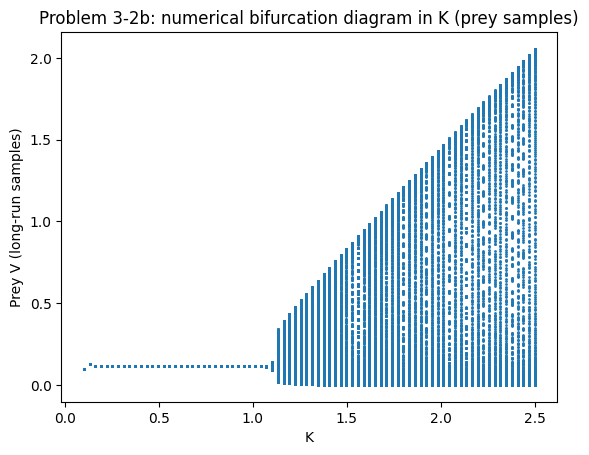

In [6]:
def rm_bifurcation_points(K_values, a=1, b=1, h=1.25, q=0.1, r=1.0,
                          burn=400, sample=200, step=0.2, y0=(0.2,0.01)):
    Ks=[]
    Vs=[]
    y=list(y0)
    for K in K_values:
        t_end = burn + sample
        t_eval = np.arange(0, t_end+step, step)
        sol = solve_ivp(lambda t,yy: rm_rhs(t,yy,r,K,a,h,b,q),
                        (0,t_end), y, t_eval=t_eval, rtol=1e-8, atol=1e-10)
        V = sol.y[0]
        y = [sol.y[0,-1], sol.y[1,-1]]
        mask = sol.t >= burn
        Ks.extend([K]*np.sum(mask))
        Vs.extend(list(V[mask]))
    return np.array(Ks), np.array(Vs)

Kvals = np.linspace(0.1, 2.5, 80)
Ks, Vs = rm_bifurcation_points(Kvals)

plt.figure()
plt.plot(Ks, Vs, marker=".", linestyle="none", markersize=2)
plt.xlabel("K"); plt.ylabel("Prey V (long-run samples)")
plt.title("Problem 3-2b: numerical bifurcation diagram in K (prey samples)")
plt.show()


### Solution notes (3‑2)

- For smaller $K$, trajectories converge to a stable coexistence equilibrium (damped oscillations).
- Beyond a threshold $K$, the equilibrium loses stability via a Hopf bifurcation and a stable limit cycle appears.
- The numerical bifurcation diagram shows this as the transition from a single band of points (equilibrium) to a vertical spread (cycle values).
- This is the computational signature of the **paradox of enrichment** (see the chapter section *Holling type II response and the Rosenzweig–MacArthur model*).


## Problem 3‑2c — Two coupled patches (predator dispersal)

To investigate how spatial predator–prey systems can be less likely to become extinct, consider a model with two patches.
Predators move between patches at rate $d$.

The model is

$$
\begin{aligned}
\frac{dV_1}{dt} &= V_1\, r\,(k - V_1) - \frac{\alpha V_1 P_1}{1+\alpha h V_1},\\
\frac{dP_1}{dt} &= P_1\left(\frac{\beta V_1}{1+\alpha h V_1} - q\right) + d(P_2-P_1),\\
\frac{dV_2}{dt} &= V_2\, r\,(k - V_2) - \frac{\alpha V_2 P_2}{1+\alpha h V_2},\\
\frac{dP_2}{dt} &= P_2\left(\frac{\beta V_2}{1+\alpha h V_2} - q\right) + d(P_1-P_2).
\end{aligned}
$$

You have 4 variables, so making a phase portrait is much harder (your phase space is 4D).
To visualise the dynamics in 2D you will have to make some choices.
You could, for example:
- plot $(V_1,P_1)$ in a phase plane;
- plot total predators vs total prey;
- plot $\log(V_1+V_2)$ vs $\log(P_1+P_2)$ to see what happens when values get very small.

Create a solution for $k=14$, $d=0.42$, $h=0.1$, $\alpha=1$, $\beta=1$, $q=1$, $r=0.05$.
Look at the solution over time and in the phase plane (just plot one solution).
What happens? Is this different from the non‑spatial model?

Next, do the same but now for $k=18$ (same other parameters).
You will need to integrate for a long time. What happens now?

Finally, set parameters to $k=20$ (same other parameters).
You will need to integrate for a long time. What happens now?

**Related chapter section:**  
- *Space: two coupled patches*


**Note (solver warnings).** During execution you may see `LSODA` warnings (e.g. “too much accuracy requested” / convergence warnings). They don’t stop execution (outputs are still produced), but if you want them gone we can switch those cells to `RK45` with relaxed tolerances or reduce stiffness by rescaling time/parameters.

 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.2514677346907D+03   r2 =  0.8285326742089D-09


/home/mhasoba/Documents/Teaching/MulQuaBio/MQB/.venv/lib/python3.12/site-packages/scipy/integrate/_ivp/lsoda.py:161: UserWarning: lsoda: Repeated convergence failures (perhaps bad Jacobian or tolerances).
  solver._y, solver.t = integrator.run(


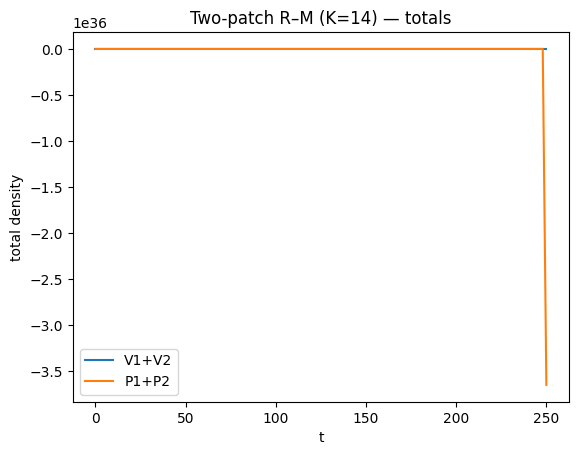

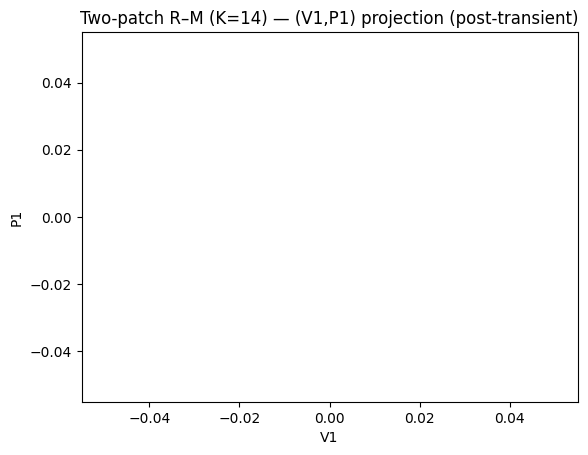

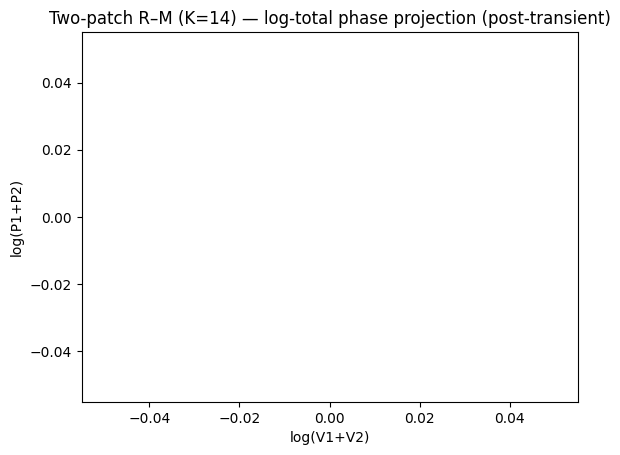

/tmp/ipykernel_106660/2985766631.py:3: RuntimeWarning: overflow encountered in scalar multiply
  pred1 = (a*V1*P1)/(1 + a*h*V1)


 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.3603969918185D+03   r2 =                  NaN


/tmp/ipykernel_106660/2985766631.py:4: RuntimeWarning: overflow encountered in scalar multiply
  pred2 = (a*V2*P2)/(1 + a*h*V2)
/home/mhasoba/Documents/Teaching/MulQuaBio/MQB/.venv/lib/python3.12/site-packages/scipy/integrate/_ivp/lsoda.py:161: UserWarning: lsoda: Excess accuracy requested (tolerances too small).
  solver._y, solver.t = integrator.run(


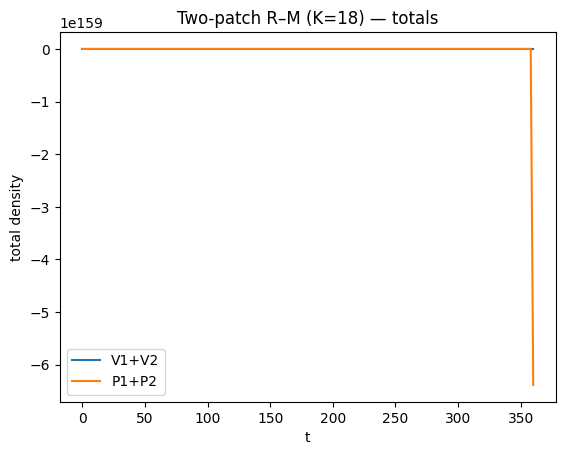

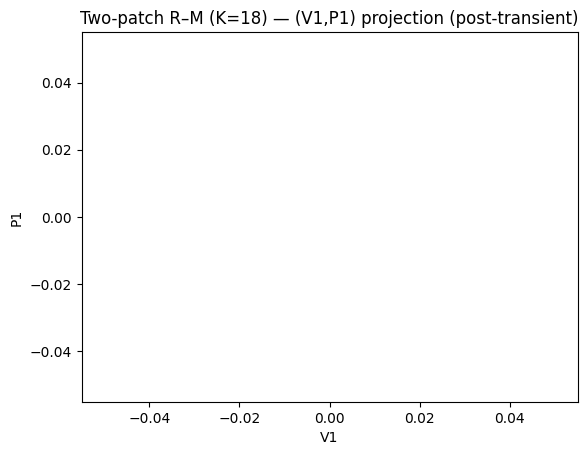

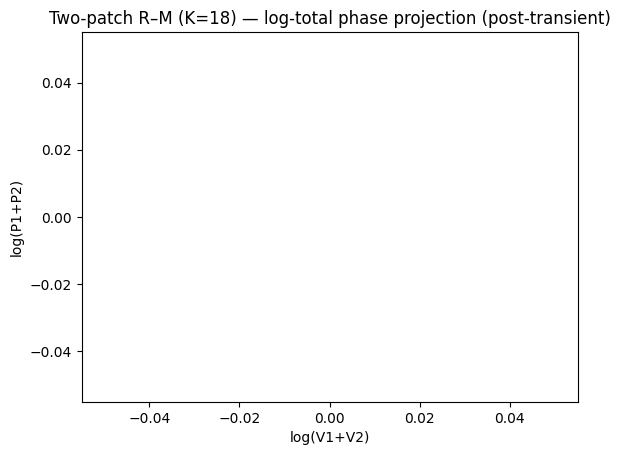

 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.3887751518806D+03   r2 =                  NaN


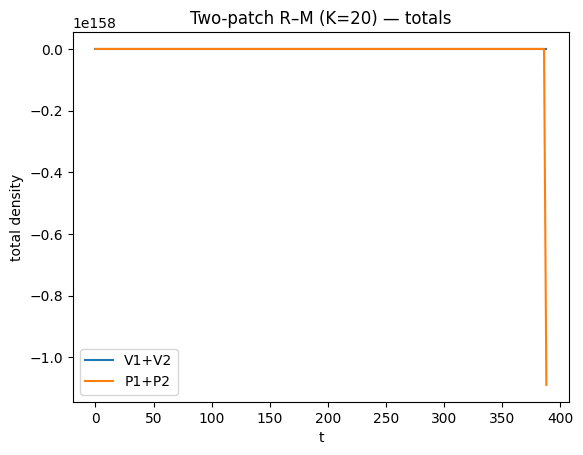

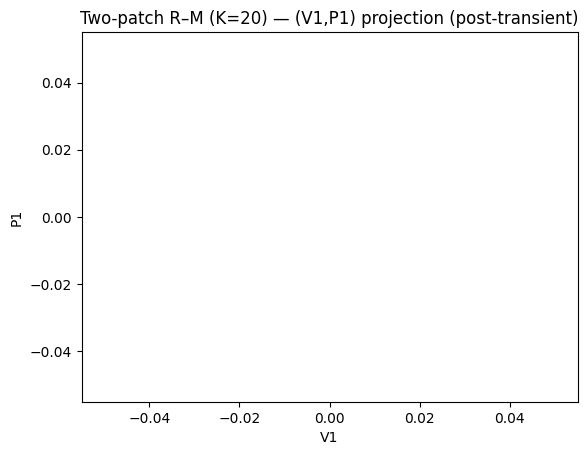

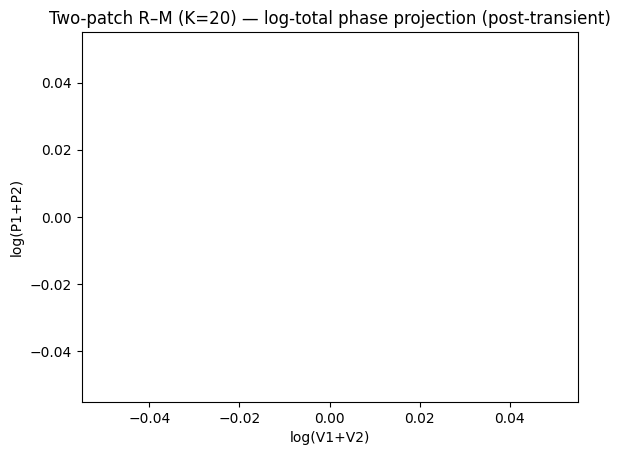

In [7]:
def rm2patch_rhs(t, y, r, K, a, h, b, q, d):
    V1, P1, V2, P2 = y
    pred1 = (a*V1*P1)/(1 + a*h*V1)
    pred2 = (a*V2*P2)/(1 + a*h*V2)
    dV1 = r*V1*(1 - V1/K) - pred1
    dV2 = r*V2*(1 - V2/K) - pred2
    dP1 = b*pred1 - q*P1 + d*(P2-P1)
    dP2 = b*pred2 - q*P2 + d*(P1-P2)
    return [dV1, dP1, dV2, dP2]

def simulate_rm2(K, d=0.42, h=0.1, a=1, b=1, q=1, r=0.05,
                 y0=None, t_end=2500, step=2.0, method="LSODA", rtol=1e-6, atol=1e-9):
    if y0 is None:
        y0 = (K, 0.01, K, 0.02)
    t_eval = np.arange(0, t_end + step, step)
    sol = solve_ivp(
        lambda t, y: rm2patch_rhs(t, y, r, K, a, h, b, q, d),
        (0, t_end), list(y0), t_eval=t_eval, method=method, rtol=rtol, atol=atol,
    )
    return sol.t, sol.y

def summarize_two_patch(t, Y, title, burn=800):
    V1, P1, V2, P2 = Y
    Vtot = V1 + V2
    Ptot = P1 + P2

    plt.figure()
    plt.plot(t, Vtot, label="V1+V2")
    plt.plot(t, Ptot, label="P1+P2")
    plt.xlabel("t"); plt.ylabel("total density")
    plt.title(title + " — totals")
    plt.legend(); plt.show()

    # Post-transient projection
    mask = t >= burn
    plt.figure()
    plt.plot(V1[mask], P1[mask])
    plt.xlabel("V1"); plt.ylabel("P1")
    plt.title(title + " — (V1,P1) projection (post-transient)")
    plt.show()

    # Log totals can reveal near-zero episodes
    eps = 1e-12
    plt.figure()
    plt.plot(np.log(Vtot[mask] + eps), np.log(Ptot[mask] + eps))
    plt.xlabel("log(V1+V2)"); plt.ylabel("log(P1+P2)")
    plt.title(title + " — log-total phase projection (post-transient)")
    plt.show()

# Short runs for book rendering (students can extend t_end/burn locally)
for K in [14, 18, 20]:
    t, Y = simulate_rm2(K=K, t_end=2500, step=2.0)
    summarize_two_patch(t, Y, title=f"Two-patch R–M (K={K})", burn=800)


### Solution notes (3‑2c)

- Two coupled patches can reduce synchrony between patches and prevent simultaneous extreme crashes.
- As $K$ increases, oscillations often increase in amplitude/period and transients can become very long; hence long integrations.
- A log‑total projection is useful for seeing whether the system approaches extremely small predator totals (quasi‑extinction).
- This illustrates how space can mitigate the paradox of enrichment (see the chapter section *Space: two coupled patches*).
